In [1]:
import numpy as np
import pandas as pd
import mglearn


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import  make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.datasets import load_wine

특성 데이터 ($\mathbf{X}$): alcohol, malic_acid 등의 13가지 화학적 수치

타겟 ($\mathbf{y}$): 0, 1, 2 (와인 종류를 나타내는 레이블)

- 0,class_0,와인 품종 1 (이탈리아 같은 지역의 품종)
- 1,class_1,와인 품종 2 (이탈리아 같은 지역의 품종)
- 2,class_2,와인 품종 3 (이탈리아 같은 지역의 품종)


| 특성 이름 (Feature Name) | 설명 (Description) | 단위 / 형식 | 중요도 (일반적) |
| --- | --- | --- | --- |
| **alcohol** | 알코올 함량 | % vol (볼륨 기준) | 높음 |
| **malic_acid** | 말산 함량 | g/L | 보통 |
| **ash** | 회분 (재) 함량 | g/L | 낮음 |
| **alcalinity_of_ash** | 회분의 알칼리도 (Ph) | pH 값 | 보통 |
| **magnesium** | 마그네슘 함량 | mg/L | 보통 |
| **total_phenols** | 총 페놀류 함량 (항산화 물질) | - | 높음 |
| **flavanoids** | 플라보노이드 함량 (페놀류의 일종) | - | **매우 높음** |
| **nonflavanoid_phenols** | 비(非) 플라보노이드 페놀류 함량 | - | 낮음 |
| **proanthocyanins** | 프로안토시아닌 함량 (탄닌 성분) | - | 보통 |
| **color_intensity** | 색상의 강도 (색이 진한 정도) | - | 높음 |
| **hue** | 색상 (채도, 특정 파장에서의 색조) | - | 높음 |
| **od280/od315_of_diluted_wines** | 희석된 와인에서 280nm와 315nm 파장 흡광도의 비율. 와인 단백질 측정 지표. | - | 높음 |
| **proline** | 프롤린 함량 (아미노산의 일종) | mg/L | **매우 높음** |

---

특성 중요도 관련 참고 사항: **`flavanoids`** 와 **`proline`** 은 일반적으로 와인의 품종을 분류하는 데 있어 **가장 중요한 특성**으로 알려져 있다. 플라보노이드는 와인의 맛과 색상에, 프롤린은 와인의 아미노산 구성에 큰 영향을 미친다.


```text

logistic, tree, knn 각각에 대해 결과 확인
1. train, test나누기
2. scale 하기
3. train, test 측정값확인하기( confusion은 heatmap 포함)

In [2]:
wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

x=wine_df.values
y=wine.target
wine_df['target'] = wine.target
x_train, x_test, y_train, y_test =train_test_split( x, y,test_size=0.3, stratify=y)


In [3]:
standard=StandardScaler()
lg_model=Pipeline( [
    ('scaler', standard),
    ('regress', LogisticRegression(max_iter=500) ) ] )
tr_model=Pipeline( [
    ('scaler', standard),
    ('regress', DecisionTreeClassifier() ) ] )
knn_model=Pipeline( [
    ('scaler', standard),
    ('regress', KNeighborsClassifier(n_neighbors=3) ) ] )

In [4]:
lg_model.fit(x_train,y_train)
tr_model.fit(x_train,y_train)
knn_model.fit(x_train,y_train)

,steps,"[('scaler', ...), ('regress', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


<h1>logistric

In [5]:
pred=lg_model.predict(x_test)
pred

array([1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 0])

정확도 0.9814814814814815
정밀도 0.9791666666666666
재현율 0.9841269841269842
f1 score 0.981117230527144


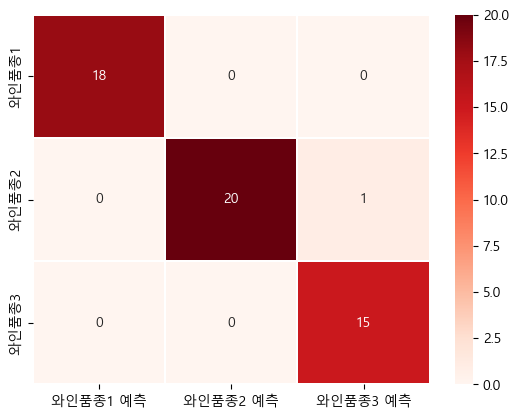

In [6]:
print('정확도', accuracy_score(y_test, pred) )
print('정밀도', precision_score(y_test, pred, average='macro') )
print('재현율', recall_score(y_test, pred,average='macro') )
print('f1 score', f1_score(y_test, pred,average='macro') )

c=confusion_matrix(y_test,pred)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
plt.show()

<h1>tree

In [7]:
pred=tr_model.predict(x_test)
pred

array([1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 1, 2, 0, 0,
       1, 2, 2, 0, 2, 1, 1, 0, 2, 0])

정확도 0.9444444444444444
정밀도 0.9488636363636364
재현율 0.947089947089947
f1 score 0.9463836547372138


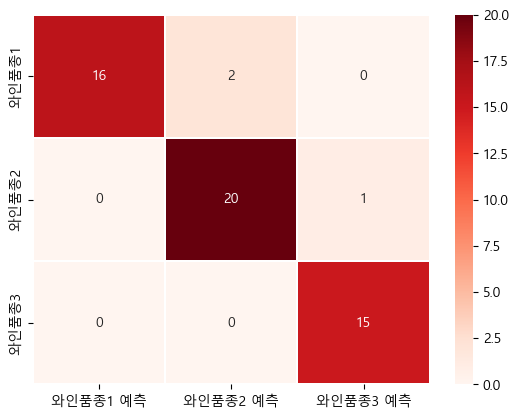

In [8]:
print('정확도', accuracy_score(y_test, pred) )
print('정밀도', precision_score(y_test, pred, average='macro') )
print('재현율', recall_score(y_test, pred,average='macro') )
print('f1 score', f1_score(y_test, pred,average='macro') )

c=confusion_matrix(y_test,pred)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
plt.show()

<h1>KNN

In [9]:
pred=knn_model.predict(x_test)
pred

array([1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 2, 1, 0, 0, 2, 0])

정확도 0.9444444444444444
정밀도 0.9432404540763674
재현율 0.9523809523809524
f1 score 0.944516632016632


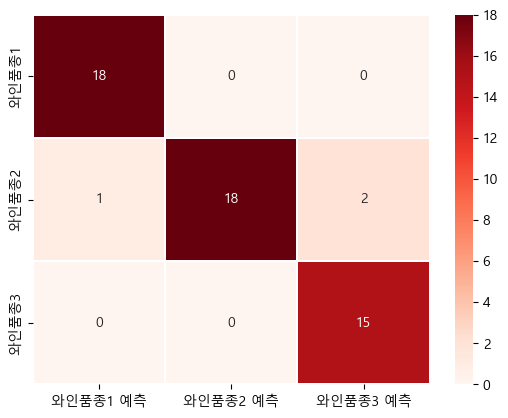

In [10]:
print('정확도', accuracy_score(y_test, pred) )
print('정밀도', precision_score(y_test, pred, average='macro') )
print('재현율', recall_score(y_test, pred,average='macro') )
print('f1 score', f1_score(y_test, pred,average='macro') )

c=confusion_matrix(y_test,pred)
sb.heatmap( c, annot=True, fmt='d',linewidths=0.2, cmap='Reds',
           xticklabels=['와인품종1 예측','와인품종2 예측','와인품종3 예측'],
           yticklabels=['와인품종1','와인품종2','와인품종3']
           )
plt.show()